In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('spam.csv')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data=data[['v1','v2']]

In [5]:
data.shape

(5572, 2)

In [6]:
data.info

<bound method DataFrame.info of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will �_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [7]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
dict={}
for i in data.columns:
    dict[i]=data[i].value_counts().shape[0]
unique=pd.DataFrame(dict,index=['Unique_Count']).transpose()
unique

,Unique_Count
v1,2
v2,5169


<AxesSubplot:>

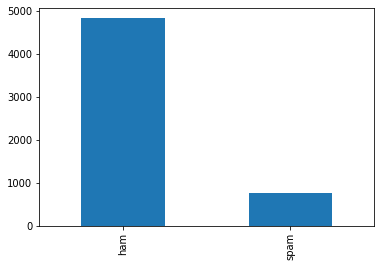

In [9]:
data['v1'].value_counts().plot(kind='bar')

In [10]:
data.duplicated().sum()

403

In [11]:
data=data.drop_duplicates(keep='first')

In [12]:
data.duplicated().sum()

0

In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.shape

(5169, 2)

In [15]:
## Lets do data cleaning
import nltk
import re
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Laxman
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
wl=WordNetLemmatizer()

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Laxman
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [23]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [24]:
data['transformed_text'] = data['v2'].apply(transform_text)

<ipython-input-24-5d486d0bcefe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['v2'].apply(transform_text)


In [25]:
data.head()

,v1,v2,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=3000)
x = cv.fit_transform(data['transformed_text']).toarray()
x 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
y=pd.get_dummies(data['v1'],drop_first=True)

In [28]:
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Naive ByesClassifier

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
model=GaussianNB()

In [32]:
model.fit(x_train,y_train)

c:\users\laxman singh\desktop\extra material\new folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [33]:
y_pred=model.predict(x_test)

In [34]:
## Checking the accuracy of model
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_test))

[[788  26]
 [108 112]]


In [35]:
print(accuracy_score(y_pred,y_test))

0.8704061895551257


## SVM

In [36]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
score = clf.score(x_test,y_test)

print(score)

c:\users\laxman singh\desktop\extra material\new folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.971953578336557


In [37]:
print(confusion_matrix(y_predicted,y_test))

[[893  26]
 [  3 112]]


In [38]:
import pickle
pickle.dump(model,open('naive_bayes.pkl','wb'))

In [39]:
x.shape

(5169, 3000)

In [40]:
x_test.shape

(1034, 3000)

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
mnb=MultinomialNB()

In [43]:
mnb.fit(x_train,y_train)

c:\users\laxman singh\desktop\extra material\new folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [44]:
mnb_pred=mnb.predict(x_test)

In [45]:
print(accuracy_score(y_test,mnb_pred))

0.971953578336557


In [46]:
pickle.dump(mnb,open('mnb.pkl','wb'))

In [49]:
pickle.dump(cv,open('cv.pkl','wb'))